In [1]:
%pylab inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sys import platform

if platform == "win32":
    path = 'C:/Users/olive/GitHub/f1-analytics/'
elif platform == "darwin":
    path = '~/Documents/GitHub/f1-analytics/'

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv(path+'data/driver_standings.csv')
merged = pd.read_csv(path+'data/merged.csv')

In [3]:
winners = merged.query('podium == 1')

([<matplotlib.patches.Wedge at 0x130fc6450>,
 [Text(0.011147385393550828, 1.0999435148219603, 'British'),
  Text(-0.862985243693284, -0.6820971112441714, 'German'),
  Text(0.21049779743342867, -1.0796715599086952, 'Dutch'),
  Text(0.8049113051066489, -0.7497451506422108, 'Finnish'),
  Text(1.0194375950466816, -0.41321542784053694, 'Australian'),
  Text(1.0774829347716783, -0.22142837504667556, 'Monegasque'),
  Text(1.0918760681800295, -0.13344156674634722, 'French'),
  Text(1.0990963512110936, -0.04457814211539753, 'Mexican')],
 [Text(0.006080392032845905, 0.5999691899028873, '49.7%'),
  Text(-0.4707192238327003, -0.372052969769548, '21.9%'),
  Text(0.11481698041823381, -0.5889117599501974, '12.9%'),
  Text(0.4390425300581721, -0.40895190035029677, '7.1%'),
  Text(0.5560568700254627, -0.22539023336756558, '4.5%'),
  Text(0.5877179644209154, -0.120779113661823, '1.3%'),
  Text(0.5955687644618342, -0.0727863091343712, '1.3%'),
  Text(0.5995071006605964, -0.024315350244762286, '1.3%')])

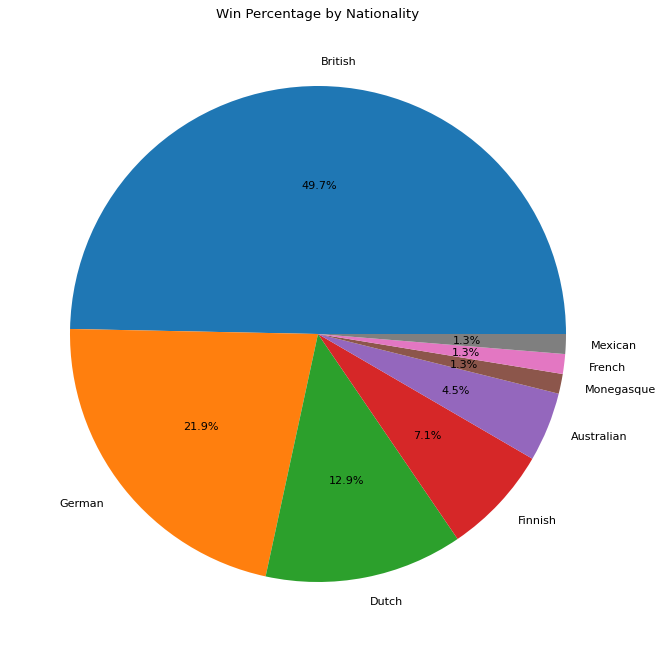

In [6]:
nationalities = winners.nationality.value_counts()

fig, axs = plt.subplots(1, dpi=80)
fig.set_size_inches(10, 15)

axs.set_title('Win Percentage by Nationality')

axs.pie(nationalities.values, labels=nationalities.index,autopct='%1.1f%%')

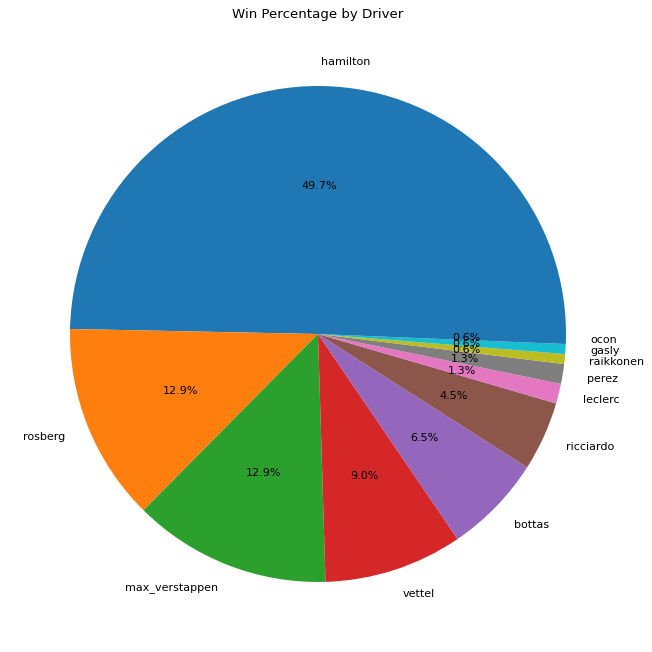

In [7]:
drivers = winners.driver.value_counts()

fig, axs = plt.subplots(1, dpi=80)
fig.set_size_inches(10, 15)

axs.set_title('Win Percentage by Driver')
axs.pie(drivers.values, labels=drivers.index,autopct='%1.1f%%')
plt.show()

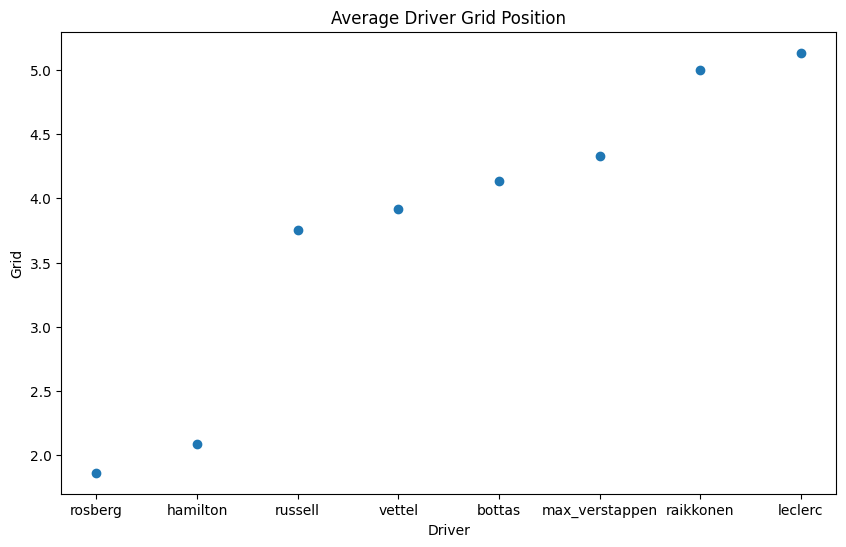

In [ ]:
avg_driver_grid = merged.groupby(
    'driver'
    ).agg({
    'grid': mean
    }
).reset_index().sort_values('grid')

driver_values = avg_driver_grid[:8]

fig, axs = plt.subplots(1, dpi=100)
fig.set_size_inches(10,6)

axs.set_title('Average Driver Grid Position')
axs.set_xlabel('Driver')
axs.set_ylabel('Grid')
axs.scatter(driver_values.driver, driver_values.grid)
plt.show()

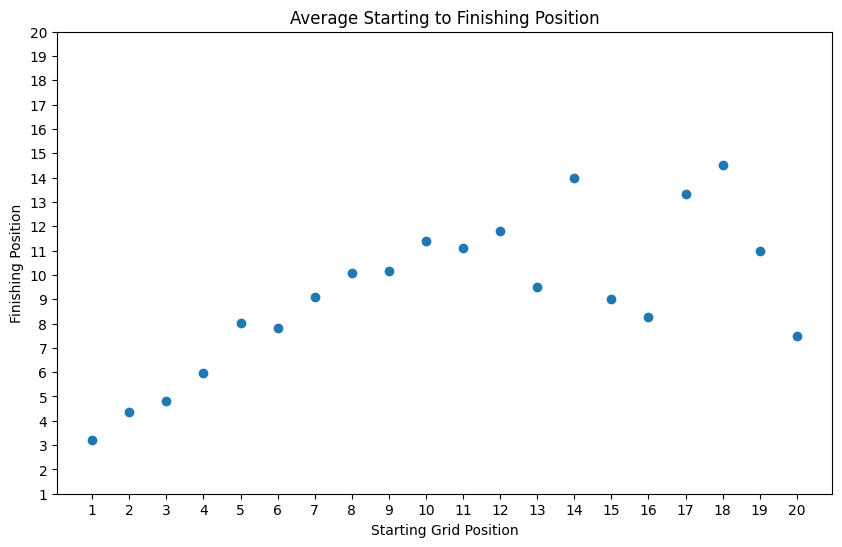

In [8]:
group_by_grid = merged.groupby(
    'grid'
    ).agg({
        'podium': mean
    }
).reset_index().sort_values('grid')

fig, axs = plt.subplots(1, dpi=100)
fig.set_size_inches(10,6)

axs.set_title('Average Starting to Finishing Position')
axs.set_xlabel('Starting Grid Position')
axs.set_xticks(list(range(1,21)))
axs.set_yticks(list(range(1,21)))
axs.set_ylim([1,20])
axs.set_ylabel('Finishing Position')
axs.scatter(group_by_grid.grid, group_by_grid.podium)
plt.show()